# **Group Exercises: Relative scales and positions in the sky**
###The aim of this exercise is to learn more about the relative scales, positions on the sky, and observability of the objects. 

###You will be using several common python libraries in addition to Astronomy specific tools to plot celestial objects, observe their relative positions, and interpret meaning from their visualizations.

> *Instructions:*  Save a copy of this Colab notebook to your own Google Drive folder **adding your name to the filename** and open in Google Colaboratory. When you have completed the exercise you will need to upload a .pdf of the Colab notebook to canvas. Instructions on how to download a .pdf of this notebook are found at the end of the exercise.

> *Documentation:* Additional resources on how to use Google Colab, enter answers, view code, and which Python libraries are used can be found in the documentation file.

>    *Honor Statement:* Recall that your name on this worksheet is considered to be a reaffirmation of your commitment to the Dartmouth Honor Principle. No online resources, phones, or calculators are allowed on these worksheets, although you may use your textbooks and notes. There are a total of 6 points.

---



#Don't forget that <u>you need to run every code block</u> **including** the ones where you input information. This does not include *text blocks* where you are writing your answers.

---

##<u>*Step 1*</u> Please fill in the information about your group below and run the blocks of code using the play button on the left side. *If you see a warning about this notebook not being authored in Google you can ignore it.*

In [1]:
#@title Number of group members
number_group_members =  1#@param {type:"integer"}
print('You have successfully set the size of your group!')

You have successfully set the size of your group!


In [2]:
#@title Type the names of your group members here
group_member_1_name = "" #@param {type:"string"}
group_member_2_name = "" #@param {type:"string"}
group_member_3_name = "" #@param {type:"string"}
group_member_4_name = "" #@param {type:"string"}
group_member_names = [group_member_1_name,group_member_2_name,group_member_3_name,group_member_4_name]
print('You have successfully input your group members names!')



You have successfully input your group members names!


---

##<u>*Step 2*</u> Begin by running the block of hidden code below by pressing the play button on the left hand side. This block imports all the python libraries and defines a functions to use later in the exercise



In [3]:
#@title  { vertical-output: false, display-mode: "form" }

##this block imports all the libraries and functions used in the exercise
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style, quantity_support
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.coordinates import get_sun
from astropy.coordinates import get_moon
plt.style.use(astropy_mpl_style)
quantity_support()
from pytz import timezone
!pip install astroplan
from astroplan import Observer
from astroplan import FixedTarget
from astroplan.plots import plot_sky,plot_sky_24hr
!pip install astroquery
from astroplan.plots import plot_finder_image
from astroplan import FixedTarget
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pylab
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import datetime as dt
from google.colab import widgets

### The blocks below defines all the functions used in the exercise

#this is a function that retrieves the coordinate information for a given celestial object
#creating a SkyCoord object by querying for a name 
def get_object_coord(object_name):
    celestial_object = SkyCoord.from_name(object_name)
    return(celestial_object)

#this function generates Astropy location and time objects based on input information
def get_observation_info(latitude, longitude, elevation, time, utcoffset):
    location = EarthLocation(lat=latitude*u.deg, lon=longitude*u.deg, height=elevation*u.m)
    utcoffset = utcoffset*u.hour
    time = Time(time, scale='utc') - utcoffset
    return(location, time)

#this function generates Astropy location and time objects for the entire group
def get_group_observation_info(latitude, longitude, elevation, time):
    location = EarthLocation(lat=latitude*u.deg, lon=longitude*u.deg, height=elevation*u.m)
    time = Time(time, scale='utc')
    return(location, time)

#this function calculates the altitude and azimuth for a given object based on location
def get_altitude_azimuth(your_object1, your_object2, your_location, your_time):
    altitude1 = your_object1.transform_to(AltAz(obstime=your_time,location=your_location))
    altitude2 = your_object2.transform_to(AltAz(obstime=your_time,location=your_location))
    formatted_altitude1 = "Azimuth: {0.az:.4}, Altitude: {0.alt:.4}".format(altitude1)
    formatted_altitude2 = "Azimuth: {0.az:.4}, Altitude: {0.alt:.4}".format(altitude2)
    return(formatted_altitude1,formatted_altitude2)

#this function converts 24 hr UTC time back to a given local time zone
def convert_utc_time(utc_time,your_tz):
  utc_time = utc_time
  converted_times_list = []
  for i in range(len(utc_time)):
    inDate = (utc_time[i])
    converted = inDate + timedelta(hours=your_tz)
    converted_times_list.append(converted)
  return(converted_times_list)

#this function determines the position of your object, the sun, and moon through a 24-hr period
def object_visibility(your_time,your_location,your_object1,your_object2):
    delta_midnight = (np.linspace(-12, 12, 200,endpoint=False))*u.hour
    midnight = Time(your_time, scale='utc')
    midnight_times = (midnight + delta_midnight)
    midnight_time = Time(your_time)
    location_horizon = AltAz(obstime=midnight_times, location=your_location)
    sun_alt_az = get_sun(midnight_times).transform_to(location_horizon)
    moon_alt_az = get_moon(midnight_times).transform_to(location_horizon)
    object1_alt_az = your_object1.transform_to(location_horizon)
    object2_alt_az = your_object2.transform_to(location_horizon)
    return(midnight_times,sun_alt_az,moon_alt_az,object1_alt_az,object2_alt_az)

#this function plots the sun, moon, and your object's altitude versus time over a 24-hr period
def plot_object_visibility(obs_times,sun_alt_az,moon_alt_az,object_alt_az1,object1_name,object_alt_az2,object2_name,your_name,your_tz):
    fig, ax = plt.subplots(figsize=(20,10))
    plt.title('Observer: ' + your_name, fontsize=30)
    plt.plot(obs_times, sun_alt_az.alt, color='r', label='Sun')
    plt.plot(obs_times, moon_alt_az.alt, color=[0.75]*3, ls='--', label='Moon')
    plt.scatter(obs_times, object_alt_az1.alt,
            c=object_alt_az1.az, label=object1_name, s=25,
            cmap='viridis')
    plt.scatter(obs_times, object_alt_az2.alt,
            c=object_alt_az2.az, label=object2_name, s=55, marker="+",
            cmap='viridis')
    plt.fill_between(obs_times, 0*u.deg, 90*u.deg,
                 sun_alt_az.alt < -0*u.deg, color='0.5', zorder=0)
    plt.fill_between(obs_times, 0*u.deg, 90*u.deg,
                 sun_alt_az.alt < -18*u.deg, color='k', zorder=0)
    locator = mdates.AutoDateLocator(minticks=8)
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter) 
    ax.set_xlim(min(obs_times),max(obs_times))
    cb = plt.colorbar()
    cb.set_label('Azimuth [deg]', fontsize=25)
    cb.ax.tick_params(labelsize=20)
    plt.legend(loc='upper left',fontsize=15,markerscale=1.5)
    plt.ylim(0*u.deg, 90*u.deg)
    plt.yticks((np.arange(0,100,10))*u.deg, fontsize=20)
    if your_tz > 0:
      plt.xlabel('24-hr Time (UTC +' + str(your_tz) + ')', fontsize=25)
    else:
      plt.xlabel('24-hr Time (UTC ' + str(your_tz) + ')', fontsize=25)
    plt.xticks(fontsize=20)
    plt.ylabel('Altitude [deg]', fontsize=25)
    return(plt.show())

#this function determines the position of your object over a 24-hr period for all group members
def object_visibility_group(times,locations,group_object):
    delta_midnight = np.linspace(-12, 12, 200,endpoint=False)*u.hour
    for i in range(len(times)):
      midnight = Time(times[i])
      midnight_times = midnight + delta_midnight
      location_horizon = AltAz(obstime=midnight_times, location=locations[i])
      object1_alt_az = your_object1.transform_to(location_horizon)
      object1_alt_azs.append(object1_alt_az)
    return(midnight_times,object1_alt_azs)

#this function plots a given object as viewed by all group members over a 24-hr period
def plot_object_visibility_group(delta_midnight,object_alt_azs,object1_name):
    fig, ax = plt.subplots(figsize=(20,10))
    plt.title('Group Observation of '+object1_name, fontsize=30)
    marker_list = ['+','o','s','D']
    for i in range(number_group_members):
      plt.scatter(delta_midnight, object_alt_azs[i].alt,
              c=object_alt_azs[i].az, label=group_member_names[i], s=55,  marker=marker_list[i],cmap='viridis')
    cb = plt.colorbar()
    cb.set_label('Azimuth [deg]', fontsize=25)
    cb.ax.tick_params(labelsize=20)
    plt.legend(loc='upper left',fontsize=15,markerscale=1.5)
    locator = mdates.AutoDateLocator(minticks=8)
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter) 
    ax.set_xlim(min(delta_midnight),max(delta_midnight))
    plt.xticks(fontsize=20)
    plt.ylim(0*u.deg, 90*u.deg)
    plt.yticks((np.arange(0,100,10))*u.deg, fontsize=20)
    plt.xlabel('UTC Time', fontsize=25)
    plt.ylabel('Altitude [deg]', fontsize=25)
    return(plt.show())

#this function plots your chosen objects on a 2D projection of the night sky where you are located
def make_skyplot(object1_name,object1_RA,object1_dec,object2_name,object2_RA,object2_dec,
                 your_longitude, your_latitude, your_elevation, your_date_time):
  location = EarthLocation.from_geodetic(your_longitude, your_latitude, your_elevation)
  observer = Observer(location=location)
  coordinates1 = SkyCoord(object1_RA, object1_dec, frame='icrs')
  altair1 = FixedTarget(name=object1_name, coord=coordinates1)
  coordinates2 = SkyCoord(object2_RA, object2_dec, frame='icrs')
  altair2 = FixedTarget(name=object2_name, coord=coordinates2)
  observe_time = your_time + np.arange(-12,13)*u.hour
  fig = plt.figure(figsize=(20, 10))
  ax = fig.add_subplot()
  plot_sky(altair1, observer, observe_time,style_sheet=None)
  plot_sky(altair2, observer, observe_time,style_sheet=None)
  plt.title('Observer: ' + your_name, fontsize=30)
  plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5),fontsize=20)
  plt.tight_layout()
  return(plt.show())

#this function plots your chosen objects on a 2D projection of the night sky for your best observatory
def make_skyplot_obs(object1_name,object1_RA,object1_dec,object2_name,object2_RA,object2_dec,
                 your_longitude, your_latitude, your_elevation, your_date_time):
  location = EarthLocation.from_geodetic(your_longitude, your_latitude, your_elevation)
  observer = Observer(location=location)
  coordinates1 = SkyCoord(object1_RA, object1_dec, frame='icrs')
  altair1 = FixedTarget(name=object1_name, coord=coordinates1)
  coordinates2 = SkyCoord(object2_RA, object2_dec, frame='icrs')
  altair2 = FixedTarget(name=object2_name, coord=coordinates2)
  observe_time = your_time + np.arange(-12,13)*u.hour
  fig = plt.figure(figsize=(20, 10))
  ax = fig.add_subplot()
  plot_sky(altair1, observer, observe_time,style_sheet=None)
  plot_sky(altair2, observer, observe_time,style_sheet=None)
  plt.title('Your Best Observatory', fontsize=30)
  plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5),fontsize=20)
  plt.tight_layout()
  return(plt.show())



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 134 kB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for astroplan: filename=astroplan-0.8-py3-none-any.whl size=83275 sha256=24d9f3c37c936bb63f64aceae3408df8e9fdea9d045b9d9b1d364a07a169c21e
  Stored in directory: /root/.cache/pip/wheels/4f/c5/6d/20497dbabe23d89c54991f269460480788f7a6d15b4d1ae134
Successfully built astroplan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.5 MB 5.0 MB/s 
     |████████████████████████████████| 832 kB 44.0 MB/s 
     |████████████████████████████████| 48 kB 4.1 MB/s 
     |████████████████████████████████| 4.0 MB 28.6 MB/s 


##<u>*Step 3*</u> Next, run the block of code below to generate and view a table with the relevant information about a selection of celestial objects

*   Discuss with your group and decide which two objects you collectively think are the most interesting.
*   You will be using these objects to perform calculations on their observability and visualize their transit depending on your location
*   Run the block of code below the table once you have made your selections and input the indeces for those objects when prompted to do so

In [4]:
#@title  { vertical-output: true, display-mode: "form" }

#define pandas dataframe from .csv with data
url = 'https://raw.githubusercontent.com/difuse-dartmouth/21w_ASTR15/main/Module_Data/Observability_Objects_Compilation.csv'
objects_df = pd.read_csv(url)
objects_df

,Name,Type,RA,DEC
0,Black Eye Galaxy,galaxy,12h 56m 43.8s,"+21° 40' 57"""
1,Spindle Galaxy,galaxy,10h 05m 14.1s,"-7° 43' 07"""
2,Virgo A,galaxy,12h 30m 49.4s,"+12° 23' 24"""
3,Rosette Nebula,nebula,6h 32m 42.0s,"+4° 58' 00"""
4,Epsilon Orionis,nebula,5h 34m 30.0s,"-1° 38' 00"""
5,Horsehead Nebula,nebula,5h 40m 54.0s,"-2° 28' 00"""
6,Orion Nebula,nebula,5h 35m 30.0s,"-5° 28' 00"""
7,Christmas Tree Cluster,open cluster,6h 41m 06.0s,"+9° 53' 00"""
8,Wild Duck Cluster,open cluster,18h 51m 06.0s,"-6° 16' 00"""
9,Hyades,open cluster,4h 26m 54.0s,"+15° 52' 00"""


In [5]:
#@title <u>*Step 4*</u> Type the index of the objects you have chosen (bold number on the far left column of table) 
index_object_1 =  0#@param {type:"integer"}
index_object_2 =  0#@param {type:"integer"}

#use index of your object to query the dataframe and define variables for name, RA, and dec
object1_name,object2_name = objects_df.iloc[index_object_1]['Name'],objects_df.iloc[index_object_2]['Name']
object1_RA,object2_RA = objects_df.iloc[index_object_1]['RA'],objects_df.iloc[index_object_2]['RA']
object1_dec,object2_dec = objects_df.iloc[index_object_1]['DEC'],objects_df.iloc[index_object_2]['DEC']
print('You have successfully chosen the '+object1_name+' and '+object2_name+' for this exercise')

#use celestial object information to get RA and Dec using predefined function
your_object1,your_object2 = get_object_coord(object1_name),get_object_coord(object2_name)
formatted_object1 = "Right Ascension: {0.ra:.4}, Declination: {0.dec:.4}".format(your_object1)
formatted_object2 = "Right Ascension: {0.ra:.4}, Declination: {0.dec:.4}".format(your_object2)
print(object1_name+' '+formatted_object1)
print(object2_name+' '+formatted_object2)

You have successfully chosen the Black Eye Galaxy and Black Eye Galaxy for this exercise
Black Eye Galaxy Right Ascension: 194.2 deg, Declination: 21.68 deg
Black Eye Galaxy Right Ascension: 194.2 deg, Declination: 21.68 deg


###<u>*Step 5*</u> Run the block of code below to visualize your choices! 

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

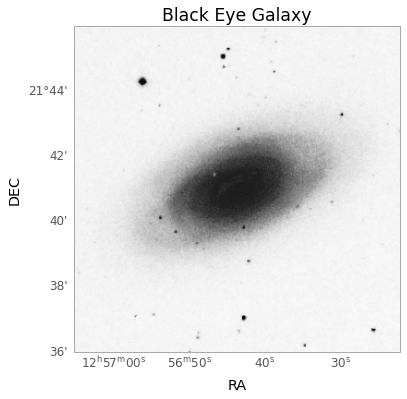

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

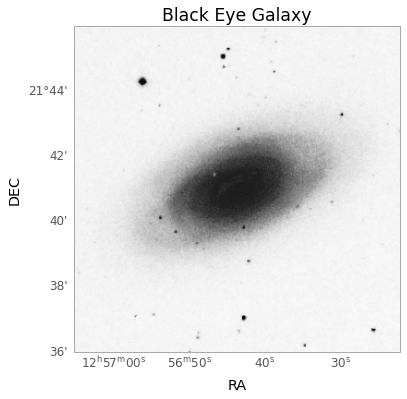

<IPython.core.display.Javascript object>

In [6]:
#@title  { vertical-output: true, display-mode: "form" }

#create grid for displaying output image of celestial objects next to one another
grid = widgets.Grid(1, 2)
with grid.output_to(0, 0):
  object1 = FixedTarget.from_name(object1_name)
  ax, hdu = plot_finder_image(object1)
  plt.show()
with grid.output_to(0, 1):
  object2 = FixedTarget.from_name(object2_name)
  ax, hdu = plot_finder_image(object2)
  plt.show()

---

##Below is a table with four observatories from around the world. Run the block to view the table. *Hint: reference diagrams from the lecture if you get stuck answering the questions*

In [7]:
#@title  { vertical-output: true, display-mode: "form" }

#define pandas dataframe from .csv with information
url = 'https://raw.githubusercontent.com/difuse-dartmouth/21w_ASTR15/main/Module_Data/Observatory_table.csv'
observatory_df = pd.read_csv(url)
observatory_df



,Telescope,Location,Latitude,Longitude,Diam (m),Type,Elevation (m)
0,MDM Observatory (MDM),Arizona,31.951841,-111.615948,2.4,Optical,1923
1,Very Large Telescope (VLT),Chile,-24.627298,-70.404374,8.0,Optical,2640
2,James Gregory Telescope (JGT),Scotland,56.341907,-2.817187,0.4,Optical,8
3,South Pole Telescope (SPT),South Pole,-90.000000,0.000000,10.0,Microwave,2771


##**1a.** For each object, provide the name of the telescope for which the object will be highest in the sky at culmination.

**a).** Please type your answer here

##**1b.** For this telescope where the object will be highest in the sky at culmination, determine the best month in which to observe it (that is, when it will be highest in the sky at midnight).

> Consult the star chart given

**b).** Please type your answer here

---

##Below you will visualize the transit of your objects across the night sky from different locations. As your location, choose a place important to you, like where you grew up.


##<u>*Step 6*</u> The first prompt is for inputting your group members' latitude and longitude in decimal degree and elevation in meters. You can look up this information using Google Maps, Google Earth, a smartphone, or whichever resource you prefer. **Ensure your units and signs are correct (e.g., positive vs. negative latitudes and longitudes)**

> Here is an example lat, long input for Hanover, NH: 43.7022, -72.2896



In [8]:
#@title input the latitude, longitude, and elevation of your locations and run the block. **Note**, if you do not need to fill out all group member latitudes leave them at "0". <b>Only enter numbers into form</b> (do not include units)
group_member_1_latitude =  0#@param {type:"number"}
group_member_1_longitude =  0#@param {type:"number"}
group_member_1_elevation =  0#@param {type:"number"}
group_member_2_latitude =  0#@param {type:"number"}
group_member_2_longitude =  0#@param {type:"number"}
group_member_2_elevation =  0#@param {type:"number"}
group_member_3_latitude =  0#@param {type:"number"}
group_member_3_longitude =  0#@param {type:"number"}
group_member_3_elevation =  0#@param {type:"number"}
group_member_4_latitude =  0#@param {type:"number"}
group_member_4_longitude =  0#@param {type:"number"}
group_member_4_elevation =  0#@param {type:"number"}
print("You have successfully input your group members' information")


You have successfully input your group members' information


##<u>*Step 7*</u> Now input the date (YYYY/MM/DD) and *UTC time zone offset*. You can find your time zone's offset from UTC time at the following page: https://en.wikipedia.org/wiki/List_of_tz_database_time_zones

##Once you have navigated to the wiki page, locate your time zone under **"TZ database name"** and look for the **"UTC offset"** and **"UTC DST offset"** columns. *ENSURE YOU INCLUDE THE SIGN (+ or -) WITH THE OFFSET*.

##**Note**: The DST column is for daylight savings time, which is between March and November. If today's date is during DST, you will choose this value.

In [9]:
#@title input today's date and the UTC offset for your current time zone below and then run the block. **Note** if you do not need to enter all group member TZ's leave them at "0"
obs_date =  "2021-02-21"#@param {type:"date"}
group_member_1_tz =  0#@param {type:"integer"}
group_member_2_tz =  0#@param {type:"integer"}
group_member_3_tz =  0#@param {type:"integer"}
group_member_4_tz =  0#@param {type:"integer"}

obs_date_time = obs_date + ' 00:00:00'
print("The date is set to ",obs_date)

The date is set to  2021-02-21


##<u>*Step 8*</u> First you will choose one group member whose location you would like to use to visualize the celestial objects, then you will visualize one of the objects as seen from all of your different locations.

In [10]:
#@title Which group member's location would you like to use for visualization first?
group_member_choice = "group_member_1" #@param ["group_member_1", "group_member_2", "group_member_3", "group_member_4"]

#create lists which store the info for each group member
group_member_1 = [group_member_1_name,group_member_1_latitude,
                  group_member_1_longitude,group_member_1_elevation,
                  group_member_1_tz]
group_member_2 = [group_member_2_name,group_member_2_latitude,
                  group_member_2_longitude,group_member_2_elevation,
                  group_member_2_tz]
group_member_3 = [group_member_3_name,group_member_3_latitude,
                  group_member_3_longitude,group_member_3_elevation,
                  group_member_3_tz]
group_member_4 = [group_member_4_name,group_member_4_latitude,
                  group_member_4_longitude,group_member_4_elevation,
                  group_member_4_tz]

#based on choice in the form, define choice for particular group member
if group_member_choice == "group_member_1":
  choice = group_member_1
elif group_member_choice == "group_member_2":
  choice = group_member_2
elif group_member_choice == "group_member_3":
  choice = group_member_3
elif group_member_choice == "group_member_4":
  choice = group_member_4

your_name = ''
if choice == group_member_1:
  your_name, your_latitude, your_longitude, your_elevation, your_tz = group_member_1[0],\
  group_member_1[1],group_member_1[2],group_member_1[3],group_member_1[4]
elif choice == group_member_2:
  your_name, your_latitude, your_longitude, your_elevation, your_tz = group_member_2[0],\
  group_member_2[1],group_member_2[2],group_member_2[3],group_member_2[4]
elif choice == group_member_3:
  your_name, your_latitude, your_longitude, your_elevation, your_tz = group_member_3[0],\
  group_member_3[1],group_member_3[2],group_member_3[3],group_member_3[4]
elif choice == group_member_4:
  your_name, your_latitude, your_longitude, your_elevation, your_tz = group_member_4[0],\
  group_member_4[1], group_member_4[2],group_member_4[3],group_member_4[4]
your_location, your_time = get_observation_info(your_latitude,your_longitude,your_elevation,obs_date_time,your_tz)
print("You have chosen to use ",group_member_choice,"'s location first")

You have chosen to use  group_member_1 's location first


##<u>*Step 9*</u> Below is the first representation of how your objects move across the night sky relative to the Sun and Moon over a 24-hr period. Run the code and answer the questions below.  **Note** if you change the date/TZ you must rerun that block of code (and also the group member choice block) to plot the new data.



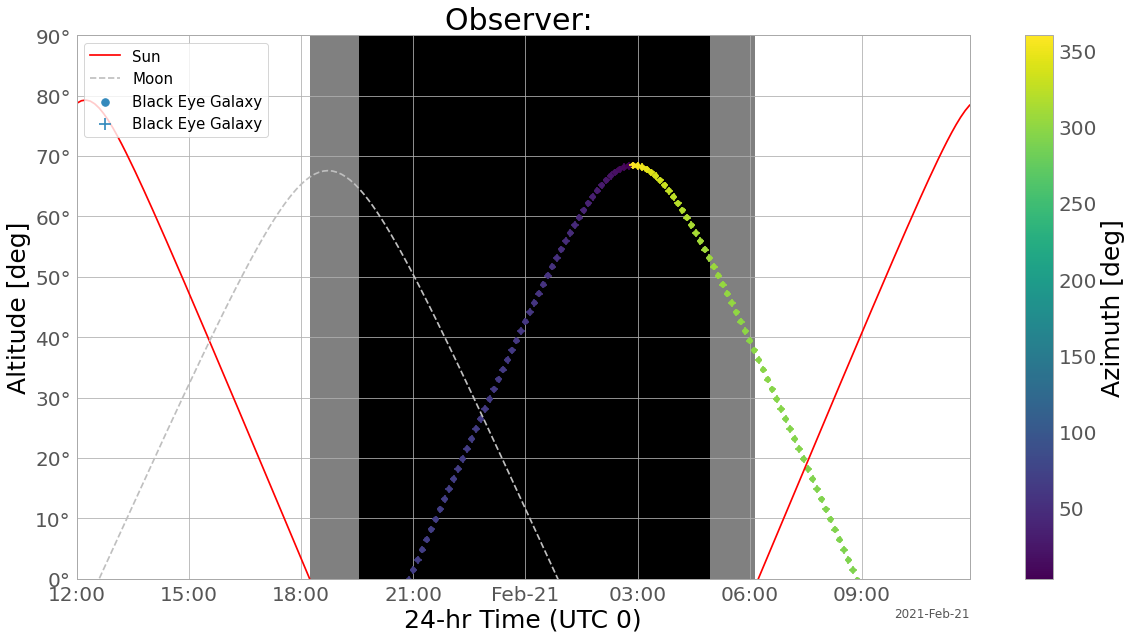

In [11]:
#@title  { vertical-output: true, display-mode: "form" }

#use input information to run function that determines the altitude of their object, 
#the sun, and moon for a 24 hour time period and then plot
obs_times,sun_alt_az,moon_alt_az,object_alt_az1,object_alt_az2 = object_visibility(your_time,your_location,your_object1,your_object2)

#take output times in UTC, turn into an array, and convert to local time zone
obs_array = np.array((obs_times).ravel())
obs_list = []
for i in range(len(obs_array)):
  x = "{0.value:6}".format(obs_array[i])
  obs_list.append(x)
dates_list = [dt.datetime.strptime(date, '%Y-%m-%d %H:%M:%S.%f') for date in obs_list]
converted_dates = convert_utc_time(dates_list,your_tz)

#convert local time zone to format that matplotlib can use
formatted_obs_list = matplotlib.dates.date2num(converted_dates)

#finally plot all the data
plot_object_visibility(formatted_obs_list,sun_alt_az,moon_alt_az,object_alt_az1,object1_name,object_alt_az2,object2_name,your_name,your_tz)

##**2a.** What visually indicates "nighttime" in this plot?

**a)** Please type your answer here

##**2b.** Are you able to observe your objects during nighttime? If so, where on their trajectory would be the best time to observe them and about what time is this?



**b)** Please type your answer here

##**2c.** If you can't observe your objects, why do you think that is? Even if you can observe your objects, what would it mean if you couldn't? Answer this in terms of your object's position (there are two possible ways the position could impact visibility).

**c)** Please type your answer here

---

##For this question, you will visualize how a single object appears differently at the locations chosen by each group member.

In [12]:
#@title <u>*Step 9*</u> What object would you like to visualize as a group?
group_object = "object1" #@param ["object1", "object2"]

#based on choice, define variable for the object
if group_object == "object1":
  group_object = object1
  group_object_name = object1_name
elif group_object == "object2":
  group_object = object2
  group_object_name = object2_name

print("You have chosen to visualize ",group_object," first")

You have chosen to visualize  <FixedTarget "Black Eye Galaxy" at SkyCoord (ICRS): (ra, dec) in deg (194.181837, 21.68297)>  first


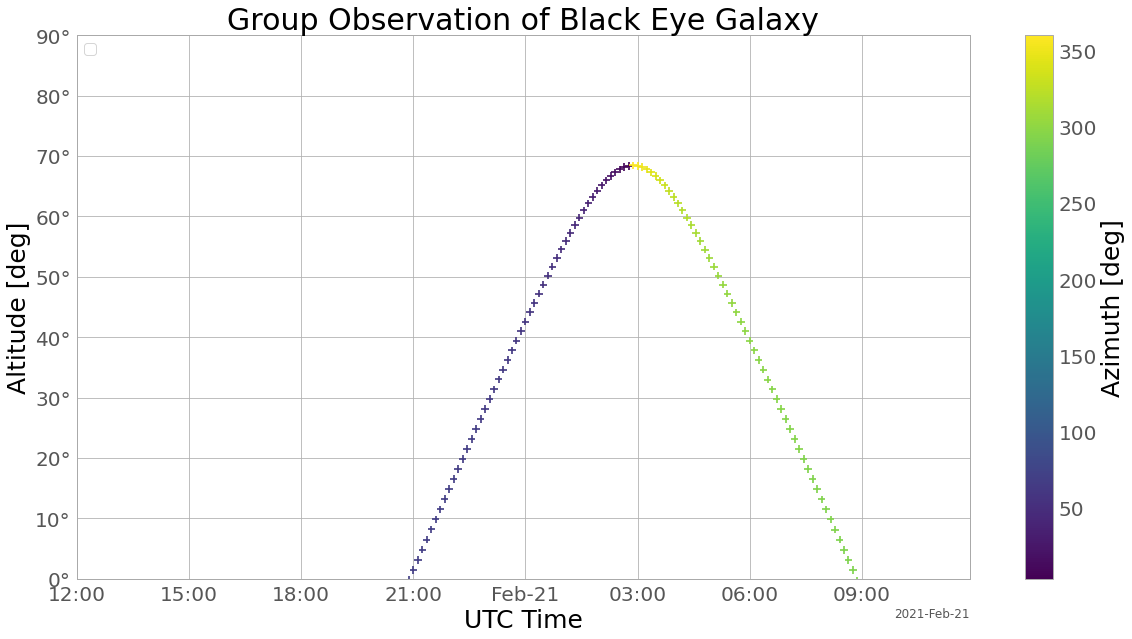

In [13]:
#@title  { vertical-output: true, display-mode: "form" }

#create list to store group variables
group_names = [group_member_1,group_member_2,group_member_3,group_member_4]
locations, times = [],[]

#loop through the group_names_list for a number of iterations equal to group size
#and store location and time info for each iteration
for i in range(number_group_members):
  group = group_names[i]
  group = group[1:4]
  location, group_time = get_group_observation_info(group[0],group[1],group[2],obs_date_time)
  locations.append(location)
  times.append(group_time)

#create list that stores times and altitudes, azimuths from function output
object1_alt_azs = []
obs_times, object1_alt_azs = object_visibility_group(times,locations,group_object)

#convert times to array and then list (have to do that to convert from Astropy Time object to string values)
obs_array = np.array((obs_times).ravel())
obs_list = []

#loop through the list of observation times, format and convert to format for matplotlib,
#and plot data
for i in range(len(obs_array)):
  x = "{0.value:6}".format(obs_array[i])
  obs_list.append(x)
dates_list = [dt.datetime.strptime(date, '%Y-%m-%d %H:%M:%S.%f') for date in obs_list]
formatted_obs_list = matplotlib.dates.date2num(dates_list)
plot_object_visibility_group(formatted_obs_list,object1_alt_azs,group_object_name)

##**3.** Which location would be better for studying the object and why?

**c)** Please type your answer here

---

##**4.** You are tasked with building a new observatory to observe your objects. What four criteria are most important for making this the best place in the world to study your celestial objects?

Please type your answer here

---

###**Downloading Instructions:** When your group has completed this exercise, download a .pdf of this notebook and upload it to Canvas. You can do this by going to File>Print>Destination>Save to PDF. 

> *Note:* you might have to play with the document scale (under More Settings) to ensure plots are not cut off. If you have difficulty producing the .pdf without errors try using a different web browser.


